In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fnmatch
import os
import geopandas as gpd
from os.path import exists

import rasterio as rio
from rasterio.plot import show
from rasterio.warp import transform_bounds
from rasterio.crs import CRS
from rasterio.mask import mask
import geopandas as gpd
import rioxarray as rxr
from shapely import wkt

from h3.utils.directories import get_data_dir
from h3.utils.directories import get_xbd_dir
from h3.dataprocessing.extract_metadata import load_and_save_df
from h3.dataprocessing.extract_metadata import filter_files

In [14]:
# Convert different damage classes (Joint Damage Scale) into integers
classes_dict = {
    "no-damage": 0,
    "minor-damage": 1,
    "major-damage": 2,
    "destroyed": 3,
    "un-classified": 4
}

data_dir = get_data_dir()
xbd_dir = get_xbd_dir()

path_to_file = os.path.join(
    data_dir,
    "datasets/processed_data/metadata_pickle",
    "metadata_posthurr_points_polygons_xy_lnglat.pkl")
file_exists = exists(path_to_file)

In [15]:
if file_exists is True:
    xbd_df = pd.read_pickle(path_to_file)
else:
    xbd_df = load_and_save_df()

xbd_tif_directory = os.path.join(xbd_dir, "geotiffs.old/hold/images")

tif_list = os.listdir(xbd_tif_directory)

post_tif_hurricane = filter_files(tif_list, "", "hurricane*pre*tif")
post_image_name = post_tif_hurricane[33].replace("tif", "png").replace("pre", "post")
print(post_image_name)
#image_name = tif_hurricane[23].replace("tif", "png")

post_image_path = os.path.join(xbd_tif_directory, post_tif_hurricane[33])
post_image_df = xbd_df.loc[xbd_df["image_name"] == post_image_name]
print(post_image_path)




pre_tif_hurricane = filter_files(tif_list, "", "hurricane*post*tif")
pre_image_name = pre_tif_hurricane[42].replace("tif", "png").replace("pre", "post")
print(pre_image_name)
#image_name = tif_hurricane[23].replace("tif", "png")

pre_image_path = os.path.join(xbd_tif_directory, pre_tif_hurricane[42])
pre_image_df = xbd_df.loc[xbd_df["image_name"] == pre_image_name]
print(pre_image_path)
    
#filtered_image_df = image_df[["polygon_xy", "point_xy", "damage_class",
#                             "image_name", "polygon_lnglat"]]

hurricane-matthew_00000371_post_disaster.png
/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-matthew_00000371_pre_disaster.tif
hurricane-florence_00000050_post_disaster.png
/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-florence_00000050_post_disaster.tif


In [22]:
#post_pickle_path = os.path.join(data_dir, "datasets/processed_data/metadata_pickle", "post_check.pkl")
#pre_pickle_path = os.path.join(data_dir, "datasets/processed_data/metadata_pickle", "pre_check.pkl")
pre_post = os.path.join(data_dir, 
                                  "datasets/processed_data/metadata_pickle",
                                  "pre_polygons_damage.pkl")

In [23]:
#post_points = pd.read_pickle(post_pickle_path)
#pre_points = pd.read_pickle(pre_pickle_path)
pre_image_post_polygon = pd.read_pickle(pre_post)

In [24]:
pre_image_post_polygon

,point_lnglat,polygon_lnglat,point_xy,geometry,disaster_name,image_name,capture_date,match_num,damage_class
0,POINT (-85.6791147540571 30.11575709314608),POLYGON ((-85.67906881170576 30.11590937478895...,POINT (980.2235108644776 151.714702031052),"POLYGON ((989.302 115.395, 947.620 171.627, 97...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,0,0
1,POINT (-85.67926940787063 30.11559691102546),"POLYGON ((-85.6792889575925 30.11566187447942,...",POINT (948.694147179883 190.1725789783849),"POLYGON ((944.474 174.772, 933.071 189.715, 94...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,1,3
2,POINT (-85.67911388403894 30.11550021856882),"POLYGON ((-85.6791135278477 30.11555096340542,...",POINT (981.1100299145855 212.7921362790846),"POLYGON ((981.044 200.725, 973.966 207.017, 96...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,2,0
3,POINT (-85.67895277054205 30.11544841978281),POLYGON ((-85.67890615427049 30.11551911018989...,POINT (1014.557959734563 224.7234903327919),"POLYGON ((1024.000 207.803, 1014.861 199.546, ...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,3,1
4,POINT (-85.67950372637581 30.1140845211106),POLYGON ((-85.67952856687066 30.11421539867797...,POINT (904.4149664871511 550.3481142071457),"POLYGON ((898.920 519.288, 867.185 553.179, 90...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,4,1
5,POINT (-85.67936992894391 30.11381495717621),POLYGON ((-85.67938356175726 30.11391203148795...,POINT (932.8153744233234 614.1249757214571),"POLYGON ((929.730 591.075, 910.936 610.178, 94...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,5,2
6,POINT (-85.67923832733466 30.11584176626538),"POLYGON ((-85.6793357429938 30.11583568489754,...",POINT (954.4455952744471 131.8766955900628),"POLYGON ((934.325 133.556, 952.835 152.066, 97...",hurricane-michael,hurricane-michael_00000376_pre_disaster.png,2017-10-05 16:51:27+00:00,6,0


/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot:>

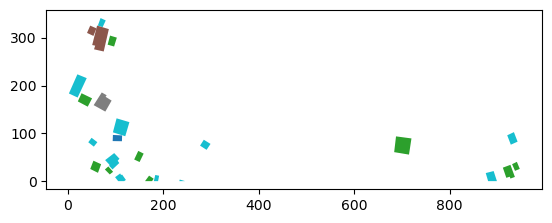

In [5]:
post_image_df.plot(column="damage_class")

post label on post image


/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


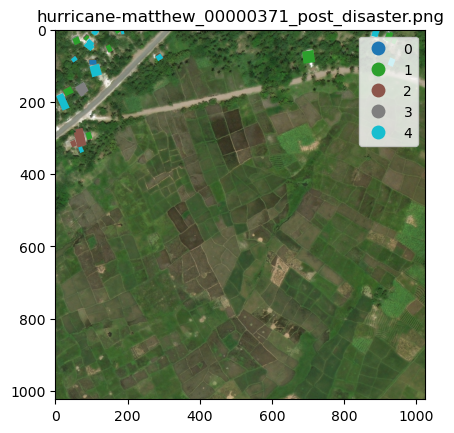

In [6]:
# post on post

print("post label on post image")
#img_path = os.path.join(xbd_tif_directory, tif_hurricane[1])

with rio.open(post_image_path) as img:
    #show(img)
    #img_extent=[img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
    
    f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
    ax = rio.plot.show(img.read(), ax=ax)
    ax.ticklabel_format(useOffset=False)
    
    post_image_df.plot(ax=ax, column = "damage_class", legend = True)
    ax.set_title(post_image_name)
    #data = img.read()

post label on pre image


/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


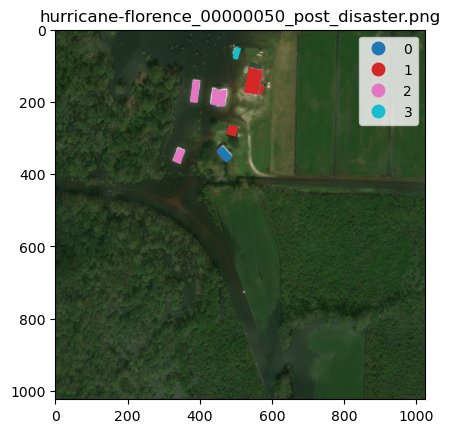

In [10]:
# post on pre
print("post label on pre image")
with rio.open(pre_image_path) as img:
    #show(img)
    #img_extent=[img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
    
    f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
    ax = rio.plot.show(img.read(), ax=ax)
    ax.ticklabel_format(useOffset=False)
    
    pre_image_df.plot(ax=ax, column = "damage_class", legend = True)
    ax.set_title(pre_image_name)
    #data = img.read()

In [ ]:
# union empty??

In [11]:
from torchvision.transforms.functional import crop

def crop800(image):
    return crop(image, 0, 0, 800, 800)

data_transforms = {
    'images': transforms.Compose([transforms.ToTensor(),
                                  transforms.Lambda(crop800),
                                  transforms.Resize((400, 400))])}

NameError: name 'transforms' is not defined

In [12]:
import torch
import torchvision.transforms as transforms
from PIL import Image

In [13]:
pre_image_path
pre_image_df

import random
import rasterio
from rasterio.windows import Window

with rio.open(pre_image_path) as img:
    xsize, ysize = 240, 240
    
    xmin, xmax = 0, img.width - xsize
    ymin, ymax = 0, img.height - ysize
    xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)
    
    window = Window(xoff, yoff, xsize, ysize)
    transform = img.window_transform(window)
    
    # Create a new cropped raster to write to
    profile = img.profile
    profile.update({
        'height': xsize,
        'width': ysize,
        'transform': transform})
    
    
    save_path = os.path.join(xbd_dir, 'output.tif')
    with rasterio.open(save_path, 'w', **profile) as dst:
        # Read the data from the window and write it to the output raster
        dst.write(img.read(window=window))
    
    #transform = transforms.CenterCrop((180, 300))
    #image_crop = transform(img)
    #image_crop.show()
    
    
    #f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
   # ax = rio.plot.show(img.read(), ax=ax)
   # ax.ticklabel_format(useOffset=False)
    
   # pre_image_df.plot(ax=ax, column = "damage_class", legend = True)
   # ax.set_title(pre_image_name)
    #data = img.read()

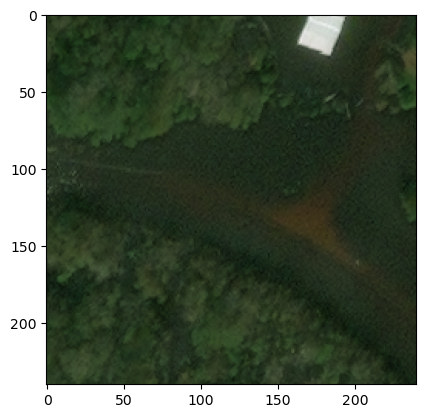

In [14]:
path = os.path.join(xbd_dir, 'output.tif')
with rio.open(path) as img:
    f, ax = plt.subplots()
    ax = rio.plot.show(img.read(), ax=ax)